In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import json

In [2]:
fname = 'dep-name.json'
with open(fname, 'r') as file:
    dep_name = json.loads(file.read())

In [3]:
fname = 'sp-pos-quot-dep-2021-03-28-19h20-processed.csv'
d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
d['dep'] = d['dep'].astype('str')

In [4]:
deps = d['dep'].unique()
ages = d['cl_age90'].unique()

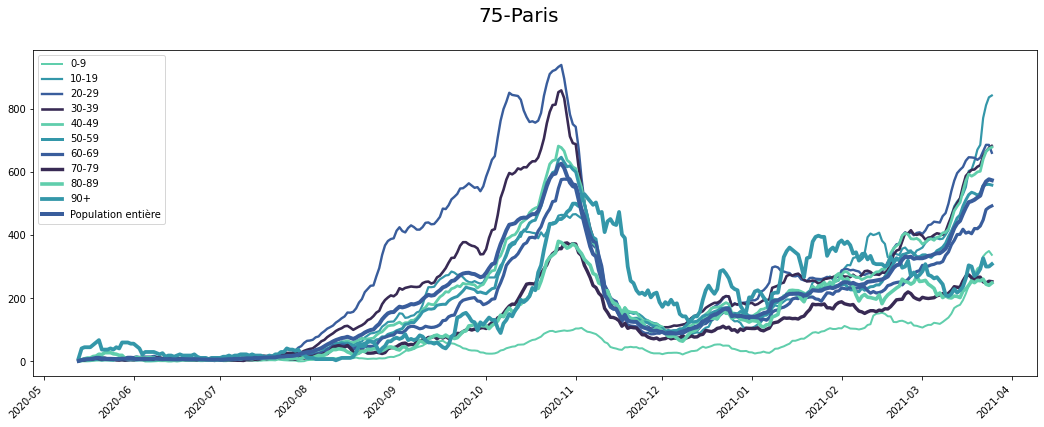

In [5]:
for dep in deps[75:76]:
    dplot = d[d.dep == dep]
    label = {0 : 'Population entière',
            9: '0-9',
            19: '10-19',
            29: '20-29',
            39: '30-39',
            49: '40-49',
            59: '50-59',
            69: '60-69',
            79: '70-79',
            89: '80-89',
             90: '90+'
            }
    fig = plt.figure(figsize = (18,6))
    palette = sns.set_palette("mako_r",4)
    
    for i, age in enumerate(ages):
        dplot2 = dplot.loc[d.cl_age90 == age]
        plt.plot(dplot2.jour, dplot2["incidence hebdo"], label = label[age], linewidth = 2 + i * 0.2)
    plt.legend()
    plt.xticks(rotation=45, ha='right')
fig.suptitle('75-Paris', fontsize = 20)
fig.savefig("fig1.jpg", pad_inches = 0)

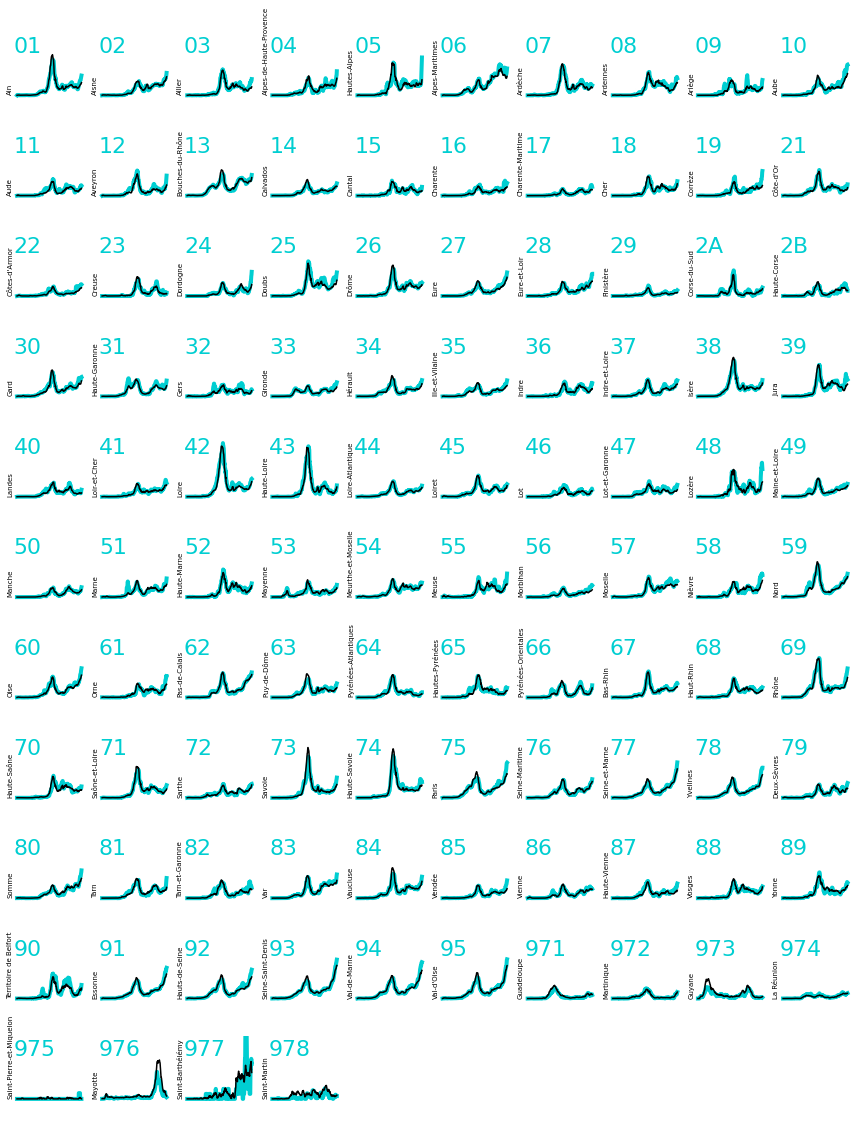

In [22]:
fig, axs = plt.subplots(11, 10, figsize = (15,20))
axs = axs.ravel()
for ax in axs:
    ax.set_axis_off()
for i, dep in enumerate(deps):
    sns.set_palette("mako",2)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 19]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "darkturquoise", linewidth = 4)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 0]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "black")
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 89]
    #axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = 'blue')
    axs[i].set_ylim(-500,1500)
    axs[i].set_axis_off()
    axs[i].set_title(dep, loc = 'left', y = 0.7, fontsize = 22, c = "darkturquoise")
    axs[i].set_title(dep_name[dep], x = -0.05, y = 0.2, rotation = 90, fontsize = 7)
fig.savefig("fig2.svg", pad_inches = 0)

In [24]:
fig.savefig("fig2.pdf", pad_inches = 0)